In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
trainds = pd.read_csv("train.csv")
trainds.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
trainds.shape

(891, 12)

In [4]:
trainds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
trainds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
categorical_columns = trainds.dtypes[trainds.dtypes == "object"].index
trainds[categorical_columns].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
del trainds["PassengerId"]
trainds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
del trainds["Ticket"]
trainds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [9]:
trainds["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [10]:
new_survived = pd.Categorical(trainds["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])
new_survived
trainds["Survival_class"] = new_survived
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [11]:
new_Passenger_class = pd.Categorical(trainds["Pclass"])
new_Passenger_class = new_Passenger_class.rename_categories(["Class1","Class2","Class3"])
new_Passenger_class
new_Passenger_class.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [12]:
trainds["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [13]:
string_cabin = trainds["Cabin"].astype(str)
lst = []
for word in string_cabin: 
    first_letter = word[0]
    lst.append(first_letter)
first_letter_array = np.array(lst)
first_letter_array
categorical_cabin = pd.Categorical(first_letter_array)
categorical_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [14]:
trainds["Cabin"] = categorical_cabin
trainds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survival_class
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S,Died
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,Survived
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S,Survived
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,Survived
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S,Died
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,n,S,Died
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B,S,Survived
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,n,S,Died
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C,Survived


In [15]:
indices_of_NullAge = np.where(trainds["Age"].isnull())
indices_of_NullAge

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

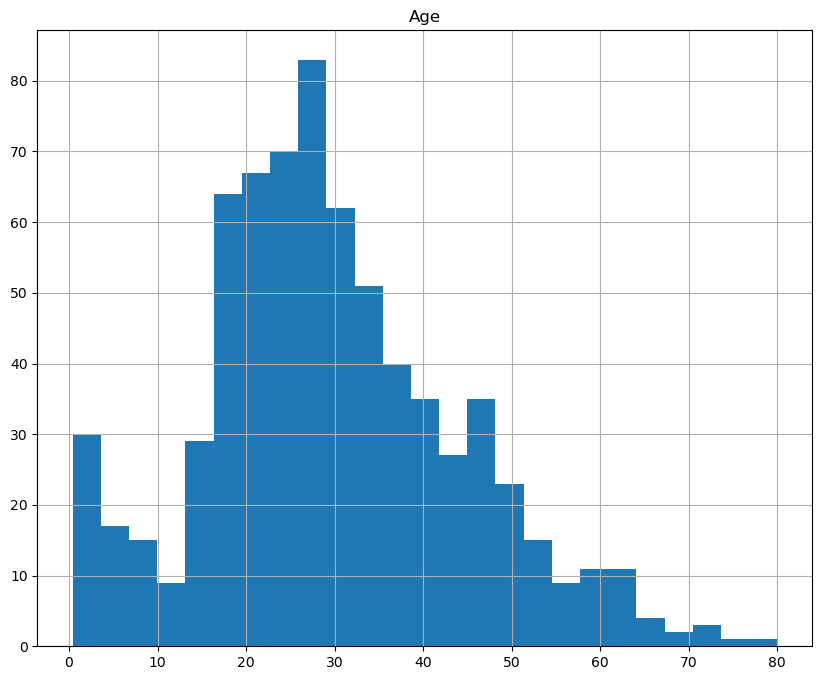

In [16]:
trainds.hist(column = "Age",figsize = (10,8),bins = 25)

In [17]:
age_missing_fill = np.where(trainds["Age"].isnull(), #check if value in Age column is null
                            28, #is it is null put age=28
                            trainds["Age"] #otherwise keep the same value
                           )

In [18]:
trainds["Age"]= age_missing_fill
trainds["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

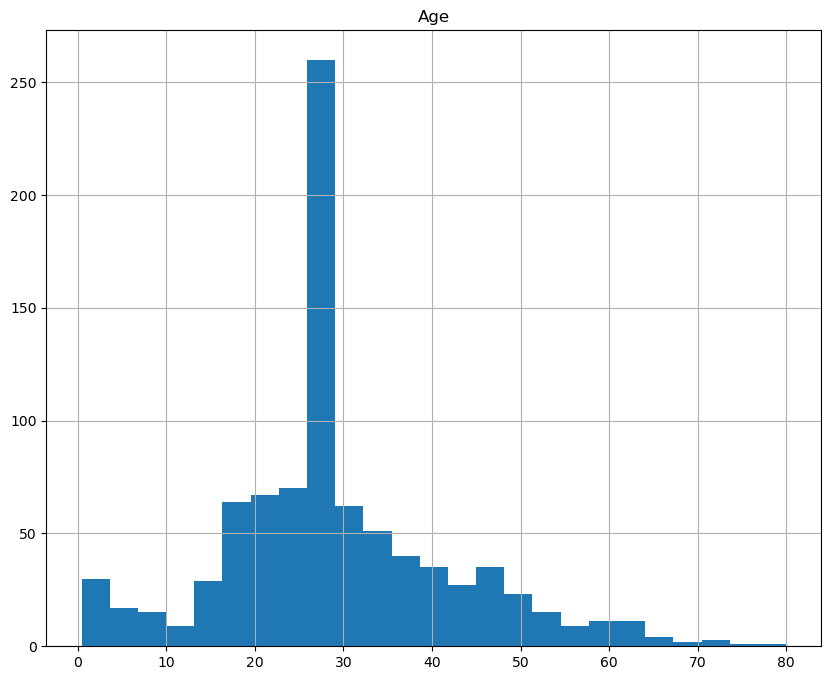

In [19]:
trainds.hist(column = "Age", figsize =(10,8), bins = 25)

<Axes: >

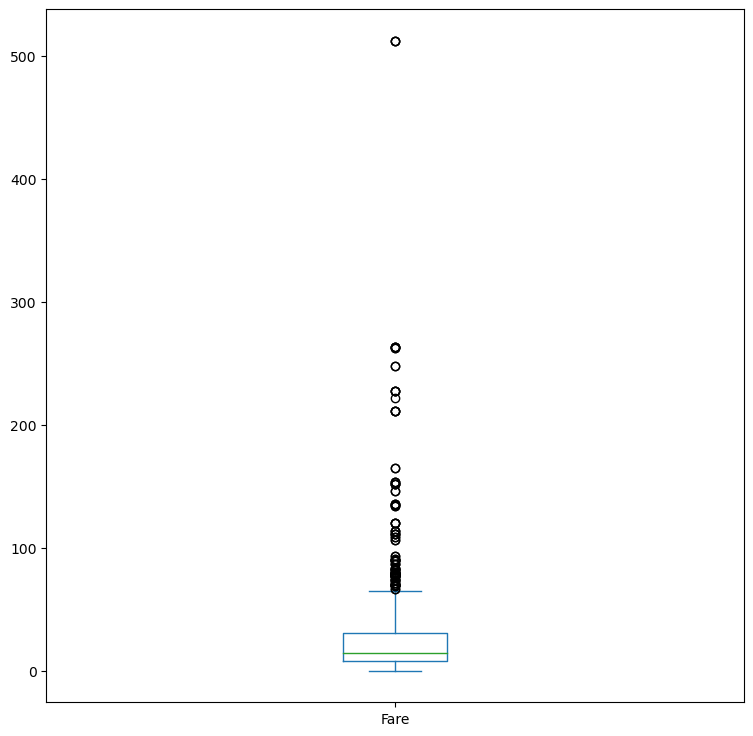

In [21]:
trainds["Fare"].plot(kind="box", figsize = (9,9))

In [27]:
max_fare_indices = np.where(trainds["Fare"] == max(trainds["Fare"]))
max_fare_indices
trainds.loc[max_fare_indices]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survival_class
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C,Survived
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C,Survived
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C,Survived


In [28]:
trainds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survival_class
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S,Died
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,Survived
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S,Survived
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,Survived
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S,Died
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,n,S,Died
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B,S,Survived
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,n,S,Died
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C,Survived


In [30]:
trainds["Family"] = trainds["SibSp"]+ trainds["Parch"]
trainds

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survival_class,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S,Died,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,Survived,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S,Survived,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,Survived,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S,Died,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,n,S,Died,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B,S,Survived,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,n,S,Died,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C,Survived,0


In [32]:
indices_MaxFamilyMembers = np.where(trainds["Family"] == max(trainds["Family"]))
trainds.loc[indices_MaxFamilyMembers]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survival_class,Family
159,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,Died,10
180,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,Died,10
201,0,3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,Died,10
324,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,Died,10
792,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,Died,10
846,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,Died,10
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,Died,10
